<a href="https://colab.research.google.com/github/GirishHiremath/ML/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing, csv file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #to plot graph
import seaborn as sns #for interactive graphs
%matplotlib inline
from sklearn.linear_model import LogisticRegression #for logistic regression
from sklearn.model_selection import train_test_split #to split the data
from sklearn.metrics import accuracy_score #Accuracy score calculation
from sklearn.metrics import classification_report, confusion_matrix #Classification report and confusion matrix
from sklearn.neighbors import KNeighborsClassifier # for k nearest neighbors
from sklearn import svm #For support vector machine algorithm
from sklearn.tree import DecisionTreeClassifier #for using decision tree algorithm




Dataset:https://www.kaggle.com/uciml/iris?select=Iris.csv

In [20]:
df=pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df.shape

(150, 6)

In [ ]:
print("no.of rows:",df.shape[0],"no.of cols:",df.shape[1])

no.of rows: 150 no.of cols: 6


In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
num_cols=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
cat_cols=['Species']
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Univariate Analysis at stage, we explore variable one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous.Lets look at these methods and statistical measures for categorical and continuous variables individually.

Continuous Variable:In case of continuous variables, we need to understand the central tendency and spread of the variable. These are measured using various statistical metrics visualization methods are shown below:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<Figure size 432x288 with 0 Axes>

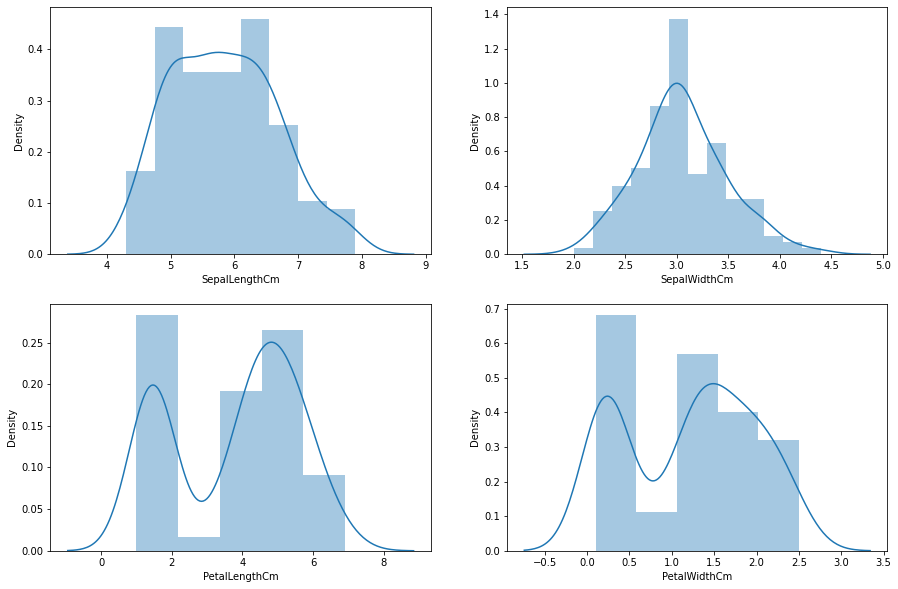

In [7]:
#Histogram plots or density plot for knowing the data
plt.figure()
plt.figure(figsize=(15,10))
num_cols=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
for col in num_cols:
  plt.subplot(int(str(22)+str((num_cols.index(col)+1))))
  sns.distplot(df[col])


<Figure size 432x288 with 0 Axes>

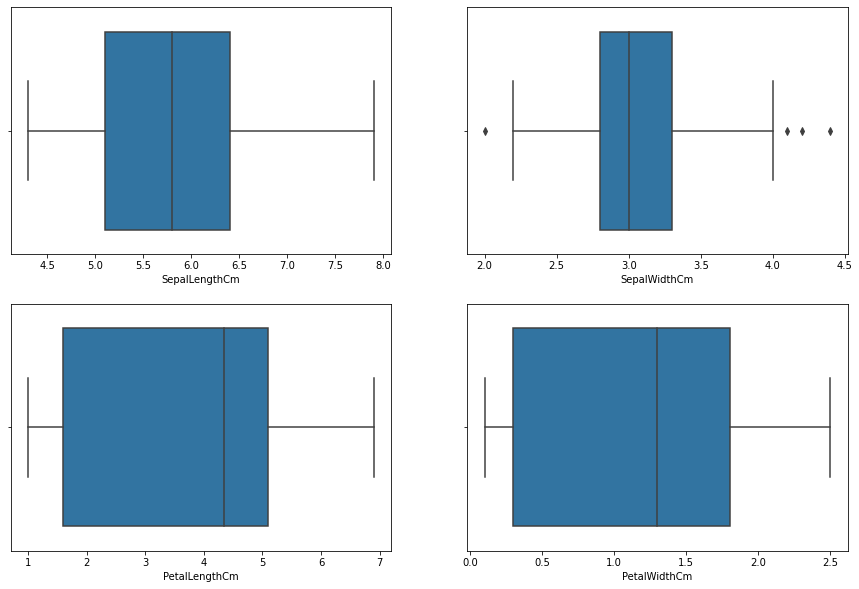

In [8]:
#Box plots- shows visual outliers in the data
plt.figure()
plt.figure(figsize=(15,10))
num_cols=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
for col in num_cols:
  plt.subplot(int(str(22)+str((num_cols.index(col)+1))))
  sns.boxplot(x=col,data=df)

It seems we have some outliers for SepalWidthCm

Categorical Variables:For categorical variables, We use frequency table to understand distribution of each category.We can also read as percentage of values under each category. It can be measured using two metrices, Count and Count% against each category.Bar chart can be used as visualization.

In [9]:
#check for any class Imbalance
df['Species'].value_counts(normalize=True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64

Text(0, 0.5, 'Count')

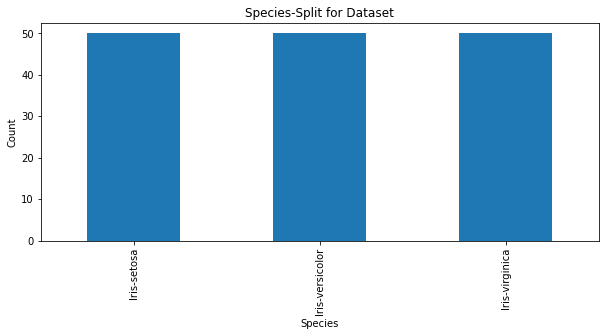

In [12]:
df['Species'].value_counts().plot.bar(figsize=(10,4),title='Species-Split for Dataset')
plt.xlabel('Species')
plt.ylabel('Count')

There is no class- Imbalance in the target Column

Bi-variate Analysis:Bi-variate Analysis find out the relationship between two variables Here, We look for association and disassociation between variables at a pre-defined significance level. We can perform bi-variate analysis for any combination of categorical and continuous variables. The combination can be:

1]Categorical & Categorical,

2]Categorical & Continuous and 

3]Continuous & Continuous

Different methods are used to tackle these combinations during analysis process

let's understand the possiable combinations in detail:

Continuous & Continuous:While doing bi-variate analysis between two continuous variables, We should look at scatter plot. It is a nifty way to find out the relationship between two variables. The pattern of scatter plot indicates the relationship between two variables. The relationship can be linear or non-linear

<Figure size 432x288 with 0 Axes>

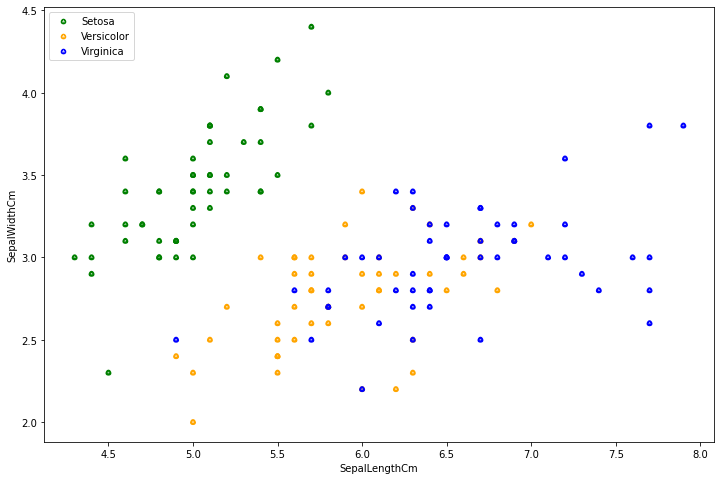

In [14]:
plt.figure()
plt.figure(figsize=(12,8))
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'],s=np.array(df.Species=='Iris-setosa'),marker='^',c='green',linewidths=5)
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'],s=np.array(df.Species=='Iris-versicolor'),marker='^',c='orange',linewidths=5)
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'],s=np.array(df.Species=='Iris-virginica'),marker='^',c='blue',linewidths=5)
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend(loc='upper left', labels=['Setosa','Versicolor','Virginica'])
plt.show()



By using SepalLengthCm and SepalWidthCm, we are NOT able to clearly separate the flowers ciusters

<Figure size 432x288 with 0 Axes>

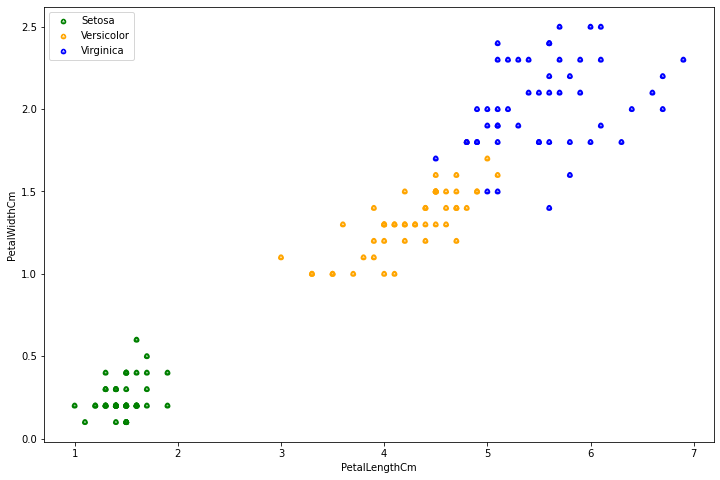

In [15]:
plt.figure()
plt.figure(figsize=(12,8))
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'],s=np.array(df.Species=='Iris-setosa'),marker='^',c='green',linewidths=5)
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'],s=np.array(df.Species=='Iris-versicolor'),marker='^',c='orange',linewidths=5)
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'],s=np.array(df.Species=='Iris-virginica'),marker='^',c='blue',linewidths=5)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend(loc='upper left', labels=['Setosa','Versicolor','Virginica'])
plt.show()

By using PetalLengthCm and PetalWidthCm, We are able to clearly separate the flowers clusters. Here these are the very importent attributes for final classification.

Scatter plot shows the relationship between the variables but does not indicates the strength of relationship amongst them. To find the strength of the relation, We use Correlation. Correlation varies beteween -1 and +1

-1:perfect negative linear correlation

+1:perfect positive linear correlation and

0:No Correlation

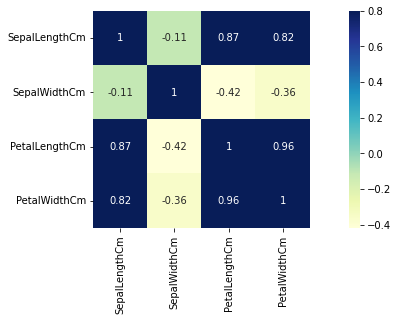

In [22]:
#Correlation between numerical variables 
num_cols_data=(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
matrix=num_cols_data.corr()
f, ax=plt.subplots(figsize=(14,4))
sns.heatmap(matrix, vmax=.8, square=True, cmap="YlGnBu", annot=True)

SepalLength and PetalLength are highly correlated PetalLength and PetalWidth are highly correlated Hence when considering for modelling, We can test by considering all the attributes and check accuracy and after we can remove one of the attribute(May be SepalLength)because the clustering groups are nicely formed by considering the Petal attributes.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


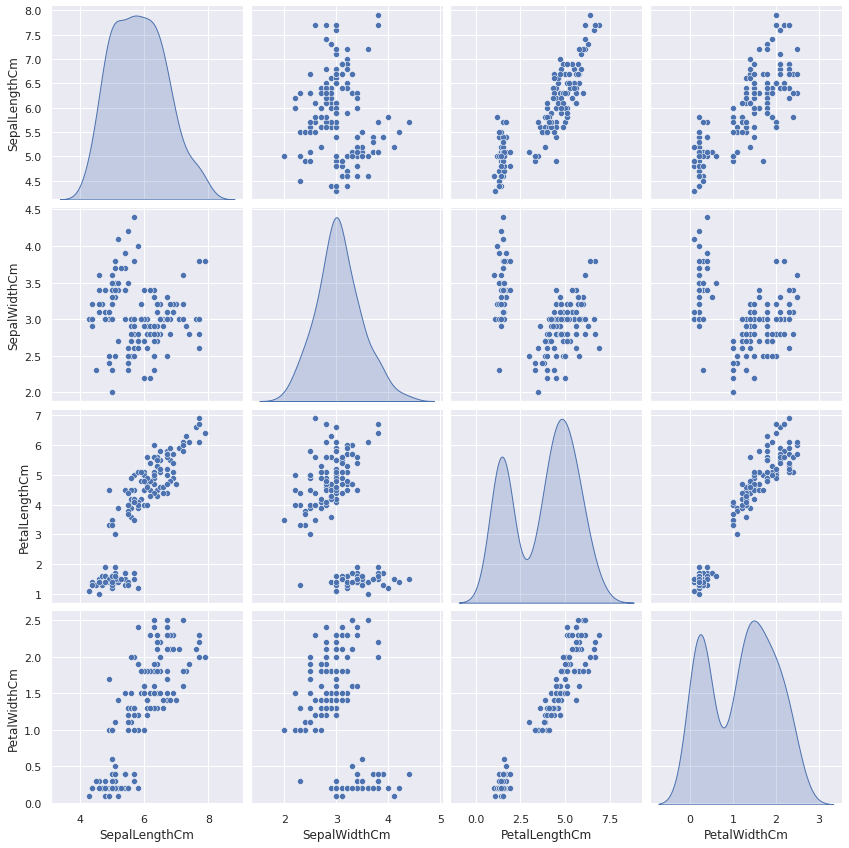

In [24]:
#Pair plot
sns.set()
columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
sns.pairplot(df[columns],size=3, kind='scatter',diag_kind='kde')
plt.show()


Through we have already plotted each of the individual charts for all the attributes, It makes good sense to check the pair plot for the griphical view of correlations amoung the attributes.(The correlation values can be seen in the correlation matrix obtained from corr plot)

Categorical & categorical:To find the relationship between two categorical variables, We can use following methodes:

Two-way table:We can start analyzing the relationship by creating a two-way table of count and count%. The rows represent the category of one variable and the columns represent the categories of the other variable. We show count and count% of observations available in each combination of row and column categories.

Stacked Column Chart:This method is more of a visual from Two-way table:

From our present dataset, We only have one categorical variable. Hence we don't require to plot above Two-way table or Stacked Column Chart

Categorical & Continuous:While exploring relation between categorical and continuous variables, we can draw box plots for each level of categorical variables.


<Figure size 432x288 with 0 Axes>

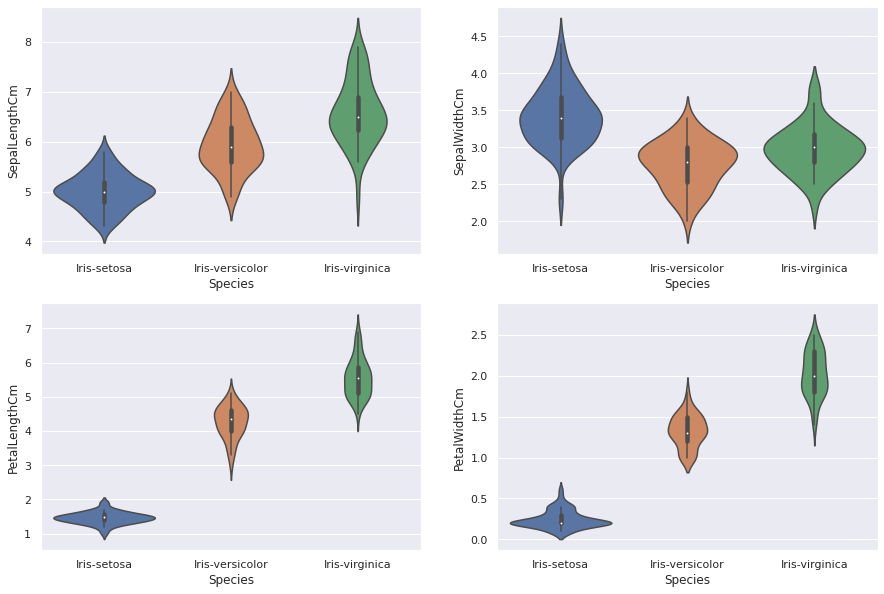

In [25]:
plt.figure()
plt.figure(figsize=(15,10))
num_cols=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
for col in num_cols:
  plt.subplot(int(str(22)+str((num_cols.index(col)+1))))
  sns.violinplot(x='Species',y=col, data=df)
  


In [26]:
#Check for missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no missing values 

Outlier treatment Outlier can be of two types: Univariate and Multivariate Above, we have discussed the example of univariate outlier. These outliers can be found when we look at distribution of single variable. Multi-variate outliers are outliers in an n-dimensional space.


In order to find them, You have to look at distributions in Milti-dimensions

From the above charts done in Univariate analysis plots and Bi-variate analysis plots-I do not see any major outliers which can impact the model

Feature Engineering Variable transformation Variable creation Feature engineering itself can be divided in 2 steps:

Variable transformation, Variable/ Feature creation These two techniques are vital in data exploration and have a remarkable impact on the power of predication.

From our dataset, we do not need to do any feature enginnering of variables. The given attributes will help us giving the predictions during the modeling process

In [32]:
X=df.drop(['Id','Species'],1)
Y=df.Species

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [30]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [31]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [34]:
#TODO: Shuffle and split the data into training and testing subsets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)

#success
print("Training and testing split was successful")

Training and testing split was successful


In [35]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
6,4.6,3.4,1.4,0.3
25,5.0,3.0,1.6,0.2
21,5.1,3.7,1.5,0.4
92,5.8,2.6,4.0,1.2
9,4.9,3.1,1.5,0.1
...,...,...,...,...
87,6.3,2.3,4.4,1.3
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
24,4.8,3.4,1.9,0.2


In [38]:
X_test.shape

(45, 4)

Logistic Regression

In [40]:
model_log=LogisticRegression()
model_log.fit(X_train,Y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [49]:
pred_cv_train=model_log.predict(X_train)
pred_cv_test=model_log.predict(X_test)

In [44]:
print('The accuracy for train data is:',accuracy_score(Y_train,pred_cv_train))
print('The accuracy for test data is:',accuracy_score(Y_test,pred_cv_test))

The accuracy for train data is: 0.9523809523809523
The accuracy for test data is: 0.9777777777777777


The recall for this model is: 1.0
TP 11
TN 16
FP 0
FN 0


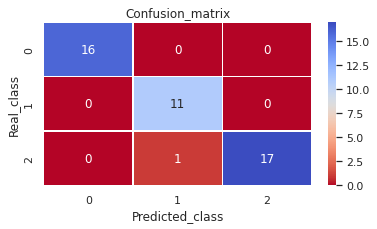

[[16  0  0]
 [ 0 11  0]
 [ 0  1 17]]

---------------------------Classification Report----------------
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.94      0.97        18

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [57]:
 from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y_test,pred_cv_test) 
print("The recall for this model is:",confusion_matrix[1,1]/confusion_matrix[1,1]+confusion_matrix[1,0])

fig=plt.figure(figsize=(6,3))#to plot the graph
print("TP",confusion_matrix[1,1,])
print("TN",confusion_matrix[0,0])
print("FP",confusion_matrix[0,1])
print("FN",confusion_matrix[1,0])
sns.heatmap(confusion_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real_class")
plt.show()
print(confusion_matrix)
print("\n---------------------------Classification Report----------------")
print(classification_report(Y_test,pred_cv_test))




SVM(Support Vector Machine)

In [59]:
model_svm=svm.SVC()
model_svm.fit(X_train,Y_train)
pred_cv_train=model_svm.predict(X_train)
pred_cv_test=model_svm.predict(X_test)
print('The accuracy for train data for SVM is:',accuracy_score(Y_train,pred_cv_train))
print('The accuracy for test data fro SVM  is:',accuracy_score(Y_test,pred_cv_test))

The accuracy for train data for SVM is: 0.9523809523809523
The accuracy for test data fro SVM  is: 0.9777777777777777


Decision Trees Classifier

In [60]:
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,Y_train)
pred_cv_train=model_dt.predict(X_train)
pred_cv_test=model_dt.predict(X_test)
print('The accuracy for train data for Decision Trees Classifier  is:',accuracy_score(Y_train,pred_cv_train))
print('The accuracy for test data fro Decision Trees Classifier  is:',accuracy_score(Y_test,pred_cv_test))


The accuracy for train data for Decision Trees Classifier  is: 1.0
The accuracy for test data fro Decision Trees Classifier  is: 0.9555555555555556


K-Nearest Neighbours

In [61]:
model_knn=KNeighborsClassifier(n_neighbors=3)#this examines 3 neighbours as one pool
model_knn.fit(X_train,Y_train)
pred_cv_train=model_knn.predict(X_train)
pred_cv_test=model_knn.predict(X_test)
print('The accuracy for train data for Decision K-Nearest Neighbours  is:',accuracy_score(Y_train,pred_cv_train))
print('The accuracy for test data fro Decision K-Nearest Neighbours  is:',accuracy_score(Y_test,pred_cv_test))


The accuracy for train data for Decision K-Nearest Neighbours  is: 0.9619047619047619
The accuracy for test data fro Decision K-Nearest Neighbours  is: 0.9777777777777777


As the k-value is hyperparameter here, we actually find out the best k-value which can help us best fit the model.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


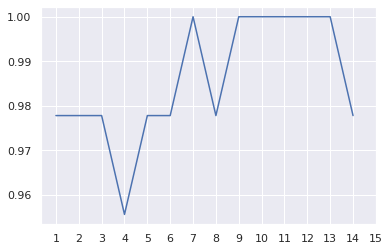

In [62]:
#we can identify the accuracy for which k-value this model gives best accuracy
index=list(range(1,15))
accur=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for i in list(range(1,15)):
  model_knn=KNeighborsClassifier(n_neighbors=i)
  model_knn.fit(X_train,Y_train)
  pred_cv_train=model_knn.predict(X_train)
  pred_cv_test=model_knn.predict(X_test)
  accur=accur.append(pd.Series(accuracy_score(pred_cv_test,Y_test)))
plt.plot(index, accur)
plt.xticks(x);
  

So from above plot it is evidient that k-value =7 the best we have for a better accuracy

Conclusions As we have only 4 attributes to do classification, PetalLengthCM and PetalWidthCM, seem to be able to clearly separate the flowers clusters. Here these are very importent attributes for final classification By just running through only basic machine learning classification algorithms, we observe that almost all the models give a good accuracy!